Definición de función senoidal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#definición de funciones
def  mi_funcion_sen( vmax , dc , ff , ph, nn , fs ):
    
    t_start = ph/ ( ff * 2 * np.pi ) # Seg
    t_sim = nn / fs
    t = np.arange( start = t_start,stop = t_sim + t_start, step = 1 / fs  ) #Seg
    
    x = vmax * np.sin( 2 * np.pi * ff* t) + dc #Volts
    
    return t, x


fs = 3000 #Hz
N = 1000 # para que delta_f sea 1 (elección de diseño)
df = fs/N
fx = 10 #Hz
ax = 1 #V
offset = 0
fase = 0

tt, xx = mi_funcion_sen( ax , offset , fx , fase, N , fs )

#Señal normalizada
sNorm = xx / np.sqrt(np.var(xx))

Text(0, 0.5, 'Tensión [V]')

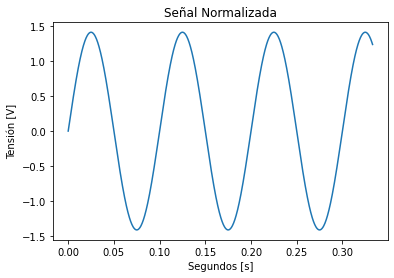

In [2]:
plt.figure(1)
plt.plot(tt,sNorm)
plt.title('Señal Normalizada')
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')

Se considera ruido analógico aplicado a la señal

Text(0, 0.5, 'Tensión [V]')

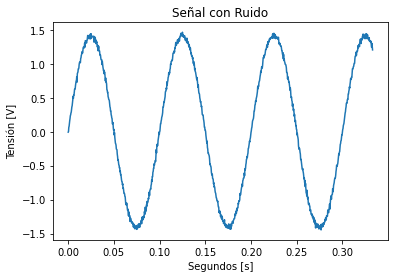

In [3]:
SNRa = 33
VARa = 10 ** (-SNRa/10)
Na = np.random.normal(0,np.sqrt(VARa),N)
sx = sNorm + Na

plt.figure(2)
plt.plot(tt,sx)
plt.title('Señal con Ruido')
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')

A continuación se analiza el espectro en frecuencia de la señal con ruido

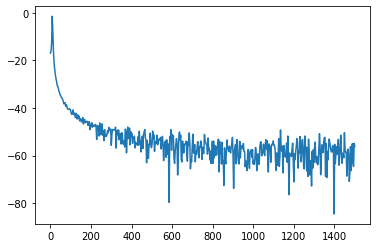

In [4]:
ff = np.linspace(0, (N-1)*df, N)
plt.figure(3)
ft_XX = 1/N*np.fft.fft( sx, axis = 0 )
bfrec = ff <= fs/2
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_XX[bfrec])**2))

Se observa que la señal efectivamente se encuentra en 10Hz. El piso de ruido está en -66dB. 
A continuación se verifica que se logra el SNR deseado

In [7]:
a = 1500 * 10 ** (-66/10)
snr = 10*np.log10(a)
snr

-34.23908740944319

A continuación se plantea una frecuencia de muestreo de 100Hz, Vf = 2V y se varía el valor de B para analizar el error conseguido en cada caso

In [9]:
Fs = 100
#Se muestrea la señal inicial
ss = sx[:: int(fs/Fs)]
ts = tt[:: int(fs/Fs)]

Vf = 2
B = 4

q = Vf / (2**(B-1))

Text(0, 0.5, 'Tensión [V]')

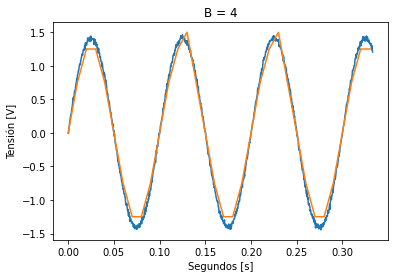

In [11]:
sq = q* np.round(ss/q)

plt.figure(5)

plt.plot(tt,sx)
plt.plot(ts,sq)
plt.title('B = 4')
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')

Text(0, 0.5, 'Tensión [V]')

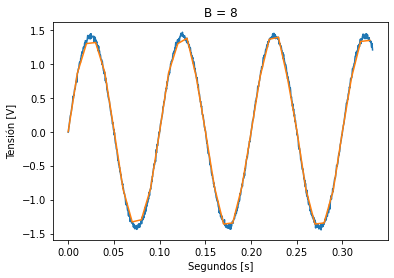

In [13]:
B = 8
q = Vf / (2**(B-1))
sq = q* np.round(ss/q)

plt.figure(5)

plt.plot(tt,sx)
plt.plot(ts,sq)
plt.title('B = 8')
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')

Text(0, 0.5, 'Tensión [V]')

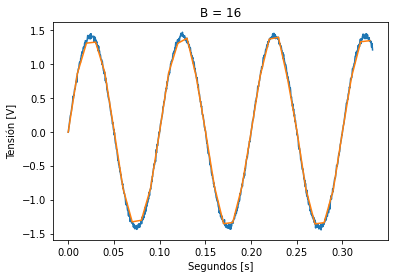

In [17]:
B = 16
q = Vf / (2**(B-1))
sq = q* np.round(ss/q)

plt.figure(5)

plt.plot(tt,sx)
plt.plot(ts,sq)
plt.title('B = 16')
plt.xlabel('Segundos [s]')
plt.ylabel('Tensión [V]')